<a href="https://colab.research.google.com/github/gangondlabharath/power-quality-issue-using-ml/blob/main/power_quality_eda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data = pd.read_excel("/content/power quality issue final dataset.xlsx")
data

,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202
0,0.025000,0.025050,0.025100,0.025150,0.025200,0.025250,0.025300,0.025350,0.025400,0.025450,...,0.034650,0.034700,0.034750,0.034800,0.034850,0.034900,0.034950,0.035000,0.035050,1
1,0.018064,0.018158,0.018247,0.018333,0.018413,0.018489,0.018561,0.018628,0.018690,0.018748,...,0.016441,0.016582,0.016718,0.016849,0.016976,0.017098,0.017215,0.017328,0.017436,1
2,0.018748,0.018801,0.013903,0.014235,0.014332,0.014420,0.014508,0.014589,0.014667,0.014739,...,0.017656,0.017753,0.017844,0.017931,0.018013,0.018090,0.018162,0.018230,0.018293,1
3,0.018748,0.018801,0.014190,0.014510,0.014605,0.014692,0.014777,0.014855,0.014931,0.015001,...,0.017702,0.017797,0.017888,0.017974,0.018055,0.018131,0.018203,0.018270,0.018332,1
4,0.018748,0.018801,0.014445,0.014755,0.014847,0.014932,0.015015,0.015092,0.015166,0.015233,...,0.017741,0.017836,0.017925,0.018011,0.018091,0.018167,0.018238,0.018304,0.018366,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017907,0.017999,0.018086,0.018168,0.018245,0.018318,0.018386,0.018450,0.018508,4
675,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017911,0.018003,0.018089,0.018172,0.018249,0.018322,0.018390,0.018453,0.018512,4
676,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017916,0.018007,0.018094,0.018176,0.018253,0.018326,0.018394,0.018457,0.018512,4
677,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017921,0.018012,0.018099,0.018181,0.018258,0.018331,0.018399,0.018462,0.018520,4


In [ ]:

data.shape

(679, 203)

In [ ]:
data.columns = [f'col{i+1}' for i in range(data.shape[1])]

In [ ]:
data.rename(columns={'col203': 'output'}, inplace=True)
data

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col194,col195,col196,col197,col198,col199,col200,col201,col202,output
0,0.025000,0.025050,0.025100,0.025150,0.025200,0.025250,0.025300,0.025350,0.025400,0.025450,...,0.034650,0.034700,0.034750,0.034800,0.034850,0.034900,0.034950,0.035000,0.035050,1
1,0.018064,0.018158,0.018247,0.018333,0.018413,0.018489,0.018561,0.018628,0.018690,0.018748,...,0.016441,0.016582,0.016718,0.016849,0.016976,0.017098,0.017215,0.017328,0.017436,1
2,0.018748,0.018801,0.013903,0.014235,0.014332,0.014420,0.014508,0.014589,0.014667,0.014739,...,0.017656,0.017753,0.017844,0.017931,0.018013,0.018090,0.018162,0.018230,0.018293,1
3,0.018748,0.018801,0.014190,0.014510,0.014605,0.014692,0.014777,0.014855,0.014931,0.015001,...,0.017702,0.017797,0.017888,0.017974,0.018055,0.018131,0.018203,0.018270,0.018332,1
4,0.018748,0.018801,0.014445,0.014755,0.014847,0.014932,0.015015,0.015092,0.015166,0.015233,...,0.017741,0.017836,0.017925,0.018011,0.018091,0.018167,0.018238,0.018304,0.018366,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017907,0.017999,0.018086,0.018168,0.018245,0.018318,0.018386,0.018450,0.018508,4
675,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017911,0.018003,0.018089,0.018172,0.018249,0.018322,0.018390,0.018453,0.018512,4
676,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017916,0.018007,0.018094,0.018176,0.018253,0.018326,0.018394,0.018457,0.018512,4
677,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017921,0.018012,0.018099,0.018181,0.018258,0.018331,0.018399,0.018462,0.018520,4


In [ ]:
data.drop(data.index[[0]], axis=0, inplace=True)

In [ ]:
data["output"].value_counts()

,count
output,
2,158
4,155
3,154
1,151
5,50
0,10


In [ ]:
data.groupby("output").mean(numeric_only=True)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202
output,,,,,,,,,,,,,,,,,,,,,
0,0.005868,0.005943,0.006016,0.006090,0.006162,0.006235,0.006306,0.006377,0.006448,0.006518,...,0.010889,0.010927,0.010965,0.011003,0.011041,0.011080,0.011119,0.011157,0.011197,0.011236
1,0.018720,0.018775,0.018099,0.018192,0.018241,0.018285,0.018325,0.018360,0.018391,0.018417,...,0.017731,0.017835,0.017934,0.018028,0.018117,0.018202,0.018283,0.018358,0.018428,0.018494
2,0.018740,0.018793,0.006556,0.007436,0.008251,0.008967,0.009629,0.010235,0.010802,0.011328,...,0.018819,0.018947,0.019070,0.019186,0.019295,0.019392,0.019496,0.019593,0.019685,0.019771
3,0.018740,0.018793,0.018842,0.018886,0.018925,0.018960,0.018990,0.019015,0.019035,0.019051,...,0.007414,0.007472,0.007528,0.014074,0.007625,0.007632,0.007668,0.007699,0.007719,0.007088
4,0.018740,0.018793,0.014719,0.014713,0.014703,0.014688,0.014670,0.014648,0.014623,0.014594,...,0.014131,0.014167,0.014200,0.014230,0.014255,0.014277,0.014295,0.014309,0.014318,0.014324
5,0.006660,0.006862,0.007064,0.007262,0.007455,0.007646,0.007832,0.008016,0.008195,0.008372,...,0.003369,0.003352,0.003335,0.003316,0.003297,0.003276,0.003255,0.003233,0.003211,0.003187


In [ ]:
data.isnull().sum()

,0
col1,0
col2,0
col3,0
col4,0
col5,0
...,...
col199,0
col200,0
col201,0
col202,0


In [ ]:
data.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col194,col195,col196,col197,col198,col199,col200,col201,col202,output
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,...,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,0.017655,0.017720,0.013813,0.014063,0.014286,0.014482,0.014663,0.014827,0.014979,0.015119,...,0.013732,0.013802,0.015343,0.013928,0.013975,0.014029,0.014077,0.014120,0.014011,2.653392
std,0.003490,0.003454,0.006236,0.006013,0.005800,0.005624,0.005473,0.005344,0.005232,0.005135,...,0.006431,0.006492,0.039036,0.006610,0.006667,0.006726,0.006785,0.006843,0.007049,1.289400
min,0.002573,0.002670,0.000740,0.001107,0.001558,0.002005,0.002451,0.002893,0.003332,0.003768,...,0.000396,0.000395,0.000395,0.000394,0.000393,0.000392,0.000390,0.000389,0.000388,0.000000
25%,0.018740,0.018793,0.007706,0.008152,0.008810,0.009279,0.010335,0.011261,0.011738,0.012138,...,0.006924,0.006822,0.006719,0.006614,0.006507,0.006399,0.006289,0.006177,0.006024,2.000000
50%,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017651,0.017754,0.017850,0.017937,0.018023,0.018102,0.018179,0.018248,0.018316,3.000000
75%,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.018089,0.018184,0.018270,0.018346,0.018418,0.018490,0.018558,0.018629,0.018684,4.000000
max,0.018793,0.018841,0.018885,0.018925,0.018959,0.019017,0.019198,0.019258,0.019282,0.019368,...,0.020970,0.021153,1.015892,0.021512,0.021686,0.021858,0.022027,0.022192,0.022353,5.000000


In [ ]:
rows_with_a = data[data.apply(lambda row: row.astype(str).str.contains('a').any(), axis=1)]
print(rows_with_a)
data= data.drop(index=251).reset_index(drop=True)

Empty DataFrame
Columns: [col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16, col17, col18, col19, col20, col21, col22, col23, col24, col25, col26, col27, col28, col29, col30, col31, col32, col33, col34, col35, col36, col37, col38, col39, col40, col41, col42, col43, col44, col45, col46, col47, col48, col49, col50, col51, col52, col53, col54, col55, col56, col57, col58, col59, col60, col61, col62, col63, col64, col65, col66, col67, col68, col69, col70, col71, col72, col73, col74, col75, col76, col77, col78, col79, col80, col81, col82, col83, col84, col85, col86, col87, col88, col89, col90, col91, col92, col93, col94, col95, col96, col97, col98, col99, col100, ...]
Index: []

[0 rows x 203 columns]


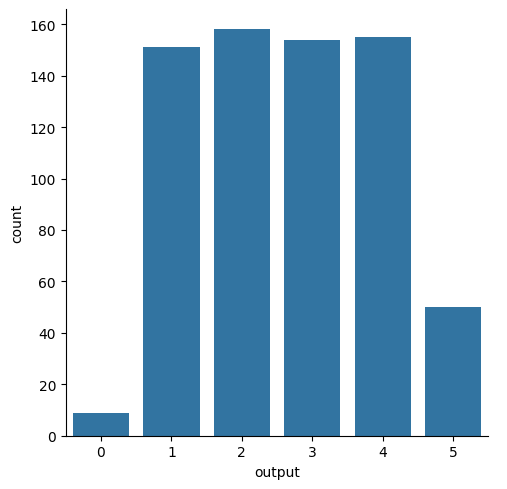

In [ ]:
sns.catplot(x='output', data = data, kind = 'count')

In [ ]:
data_arr = data.to_numpy()
print(data_arr[:679][:203])
len(data_arr)

[[1.80637410e-02 1.81578277e-02 1.82474338e-02 ... 1.73277116e-02
  1.74356369e-02 1.00000000e+00]
 [1.87475035e-02 1.88005629e-02 1.39034890e-02 ... 1.82301018e-02
  1.82929153e-02 1.00000000e+00]
 [1.87475035e-02 1.88005629e-02 1.41900684e-02 ... 1.82699360e-02
  1.83320063e-02 1.00000000e+00]
 ...
 [2.57322696e-03 2.67003929e-03 2.94335929e-03 ... 1.71603814e-03
  1.71087607e-03 5.00000000e+00]
 [2.88490903e-03 3.15294900e-03 3.38900916e-03 ... 1.88483294e-03
  1.87884673e-03 5.00000000e+00]
 [3.74262162e-03 3.97505237e-03 4.20494185e-03 ... 2.20755868e-03
  2.19978166e-03 5.00000000e+00]]


677

In [ ]:
data.head(8)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col194,col195,col196,col197,col198,col199,col200,col201,col202,output
0,0.018064,0.018158,0.018247,0.018333,0.018413,0.018489,0.018561,0.018628,0.018690,0.018748,...,0.016441,0.016582,0.016718,0.016849,0.016976,0.017098,0.017215,0.017328,0.017436,1
1,0.018748,0.018801,0.013903,0.014235,0.014332,0.014420,0.014508,0.014589,0.014667,0.014739,...,0.017656,0.017753,0.017844,0.017931,0.018013,0.018090,0.018162,0.018230,0.018293,1
2,0.018748,0.018801,0.014190,0.014510,0.014605,0.014692,0.014777,0.014855,0.014931,0.015001,...,0.017702,0.017797,0.017888,0.017974,0.018055,0.018131,0.018203,0.018270,0.018332,1
3,0.018748,0.018801,0.014445,0.014755,0.014847,0.014932,0.015015,0.015092,0.015166,0.015233,...,0.017741,0.017836,0.017925,0.018011,0.018091,0.018167,0.018238,0.018304,0.018366,1
4,0.018748,0.018801,0.014674,0.014974,0.015064,0.015147,0.015228,0.015303,0.015375,0.015440,...,0.017775,0.017869,0.017958,0.018043,0.018123,0.018198,0.018268,0.018334,0.018395,1
5,0.018748,0.018801,0.014880,0.015170,0.015259,0.015340,0.015420,0.015492,0.015562,0.015626,...,0.017805,0.017898,0.017987,0.018071,0.018150,0.018225,0.018295,0.018360,0.018420,1
6,0.018748,0.018801,0.015067,0.015348,0.015435,0.015515,0.015592,0.015663,0.015731,0.015794,...,0.017831,0.017924,0.018012,0.018096,0.018175,0.018249,0.018318,0.018383,0.018443,1
7,0.018748,0.018801,0.015237,0.015510,0.015595,0.015674,0.015749,0.015819,0.015885,0.015946,...,0.017854,0.017947,0.018035,0.018118,0.018196,0.018270,0.018339,0.018403,0.018463,1


In [ ]:
transform = StandardScaler()
data_norm = transform.fit_transform(data_arr)
data_norm_dup = data_arr.copy()

class v rms voltage wave forms


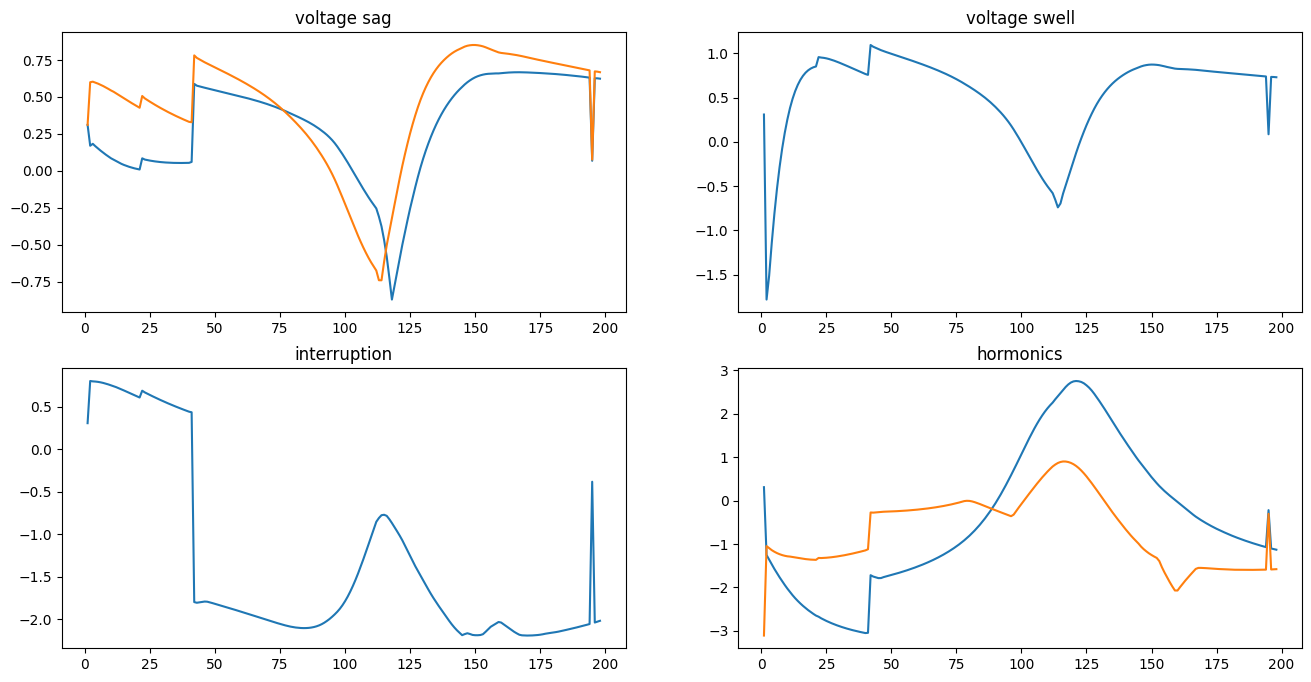

In [ ]:
print("class", "v rms voltage wave forms")
fig, axes = plt.subplots(2,2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,199)], data_norm[5][1:199])
axes[0][0].title.set_text('voltage sag')
axes[0][0].plot([i for i in range(1,199)], data_norm[45][1:199])
axes[0][0].title.set_text('voltage sag')
axes[0][1].plot([i for i in range(1,199)], data_norm[55][1:199])
axes[0][1].title.set_text('voltage swell')
axes[1][0].plot([i for i in range(1,199)], data_norm[103][1:199])
axes[1][0].title.set_text('interruption')
axes[1][1].plot([i for i in range(1,199)], data_norm[156][1:199])
axes[1][1].title.set_text('unbalance')
axes[1][1].plot([i for i in range(1,199)], data_norm[220][1:199])
axes[1][1].title.set_text('hormonics')

In [ ]:
data_phase = data/ np.sqrt(3)
data_arrs = data_phase.to_numpy()
data_norms= transform.fit_transform(data_arrs)

class Normal voltage wave froms


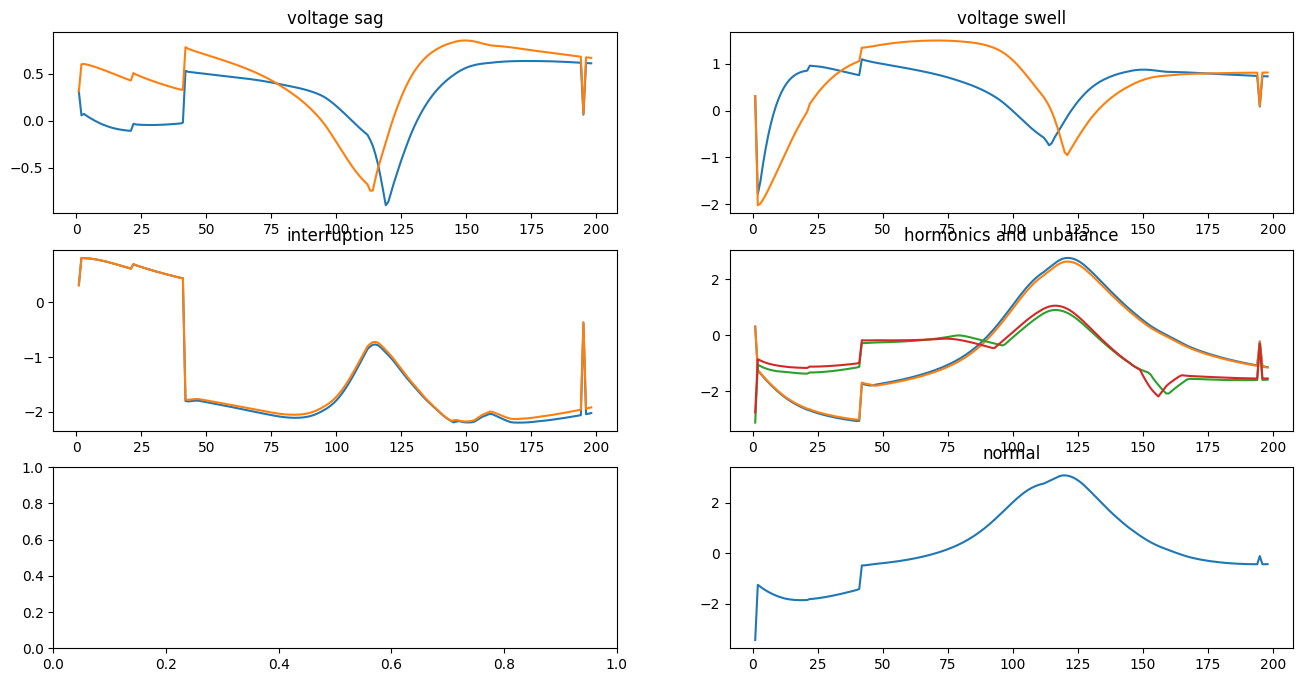

In [ ]:
print("class", "Normal voltage wave froms")
fig, axes = plt.subplots(3,2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,199)], data_norms[2][1:199])
axes[0][0].title.set_text('voltage sag')
axes[0][0].plot([i for i in range(1,199)], data_norms[45][1:199])
axes[0][0].title.set_text('voltage sag')
axes[0][1].plot([i for i in range(1,199)], data_norms[55][1:199])
axes[0][1].title.set_text('voltage swell')
axes[0][1].plot([i for i in range(1,199)], data_norms[67][1:199])
axes[0][1].title.set_text('voltage swell')
axes[1][0].plot([i for i in range(1,199)], data_norms[103][1:199])
axes[1][0].title.set_text('interruption')
axes[1][0].plot([i for i in range(1,199)], data_norms[145][1:199])
axes[1][0].title.set_text('interruption')
axes[1][1].plot([i for i in range(1,199)], data_norms[156][1:199])
axes[1][1].title.set_text('unbalance')
axes[1][1].plot([i for i in range(1,199)], data_norms[190][1:199])
axes[1][1].title.set_text('unbalance')
axes[1][1].plot([i for i in range(1,199)], data_norms[220][1:199])
axes[1][1].title.set_text('hormonics and unbalance')
axes[1][1].plot([i for i in range(1,199)], data_norms[245][1:199])
axes[1][1].title.set_text('hormonics and unbalance')
axes[2][1].plot([i for i in range(1,199)], data_norms[252][1:199])
axes[2][1].title.set_text('normal')

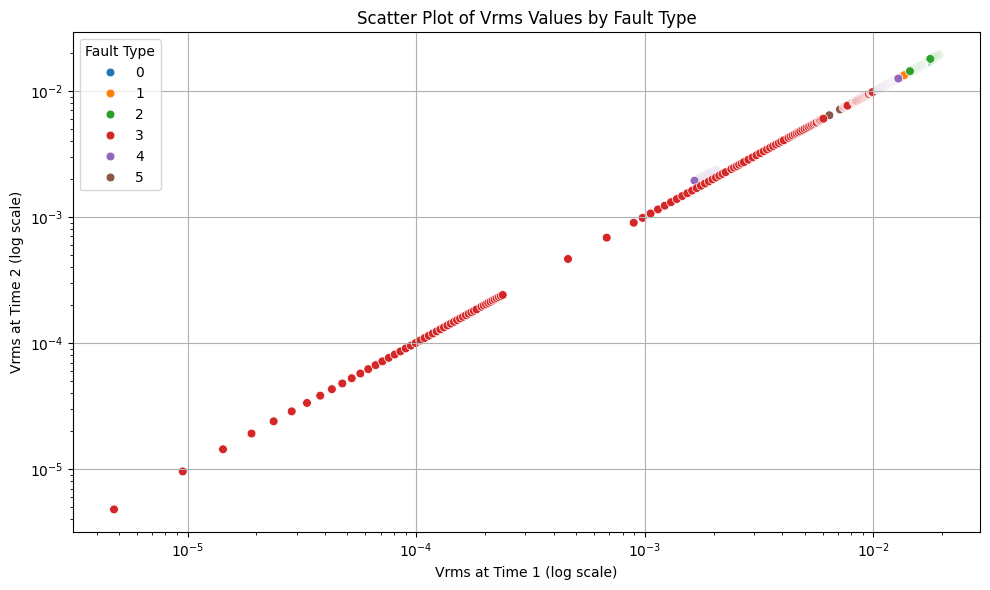

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='col60',
    y='col62',
    hue='output',
    palette='tab10',
    data=data,
    s=40,
    edgecolor='w'
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Vrms at Time 1 (log scale)')
plt.ylabel('Vrms at Time 2 (log scale)')
plt.title('Scatter Plot of Vrms Values by Fault Type')
plt.legend(title='Fault Type')
plt.grid(True)
plt.tight_layout()
plt.show()


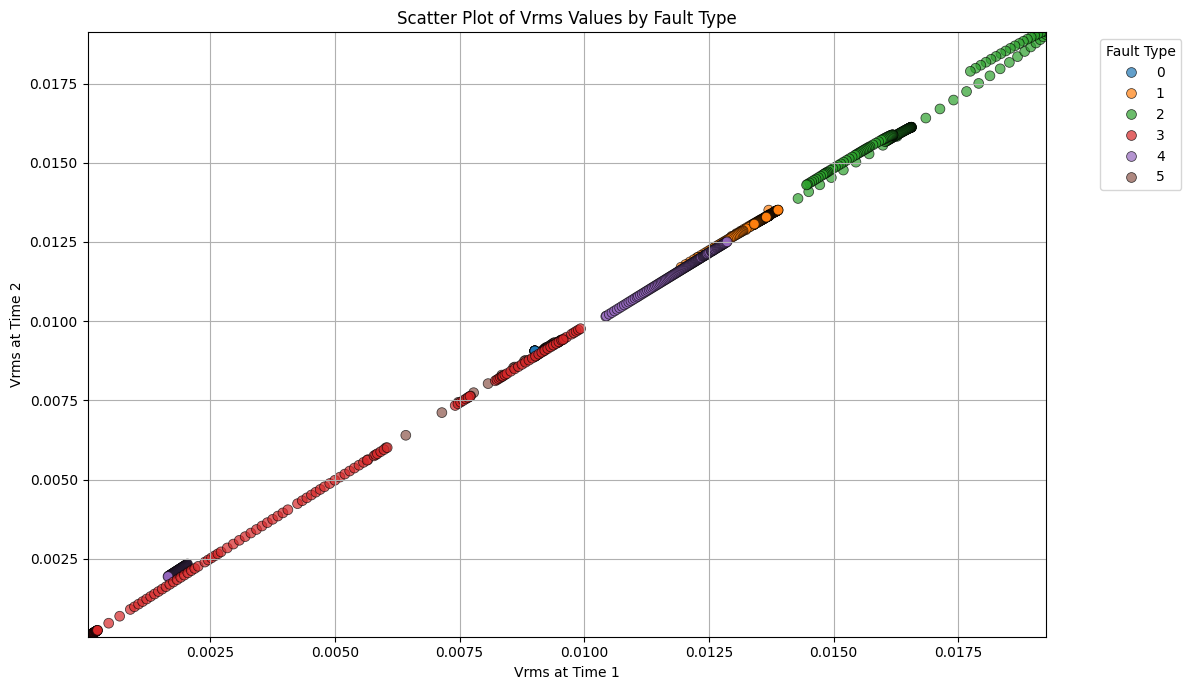

In [ ]:
plt.figure(figsize=(12, 7))

# Scatter with hue for fault type, alpha for transparency
sns.scatterplot(
    x='col60',
    y='col62',
    hue='output',
    palette='tab10',     # You can change to 'hsv' or 'Set1' for more colors
    data=data,
    s=50,
    alpha=0.7,
    edgecolor='k'
)

# Optional: Limit axis range to zoom in
plt.xlim(data['col60'].quantile(0.01), data['col60'].quantile(0.99))
plt.ylim(data['col62'].quantile(0.01), data['col62'].quantile(0.99))

plt.xlabel('Vrms at Time 1')
plt.ylabel('Vrms at Time 2')
plt.title('Scatter Plot of Vrms Values by Fault Type')
plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


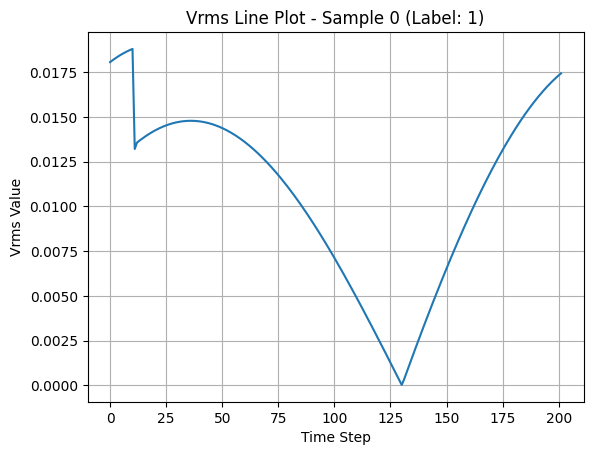

In [ ]:
sample_index = 0
plt.plot(data.iloc[sample_index, :-1].values)  # Exclude 'output' column
plt.title(f"Vrms Line Plot - Sample {sample_index} (Label: {data.iloc[sample_index, -1]})")
plt.xlabel("Time Step")
plt.ylabel("Vrms Value")
plt.grid(True)
plt.show()


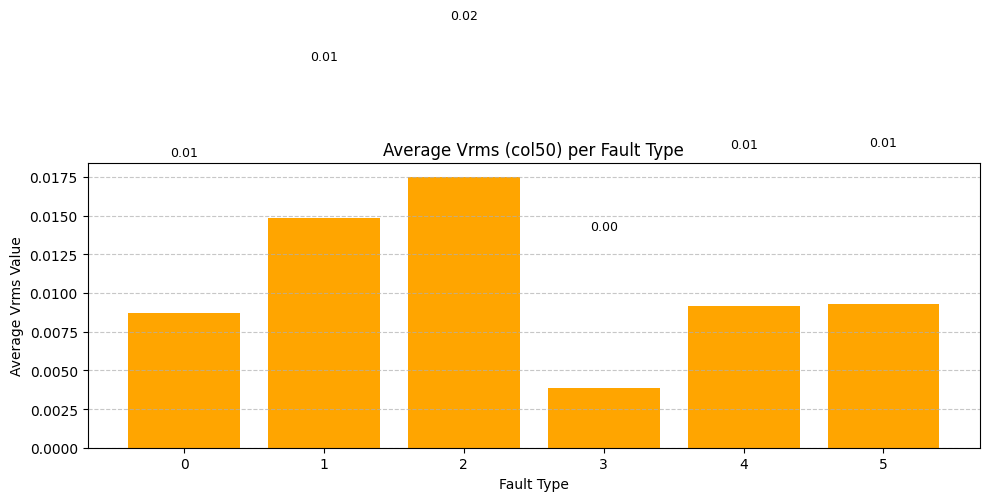

In [ ]:
mean_vrms = data.groupby('output')['col50'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_vrms.index.astype(int), mean_vrms.values, color='orange')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=9)

plt.title("Average Vrms (col50) per Fault Type")
plt.xlabel("Fault Type")
plt.ylabel("Average Vrms Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-26-b99567f9d1f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y='Vrms', data=melted, palette='Set2')


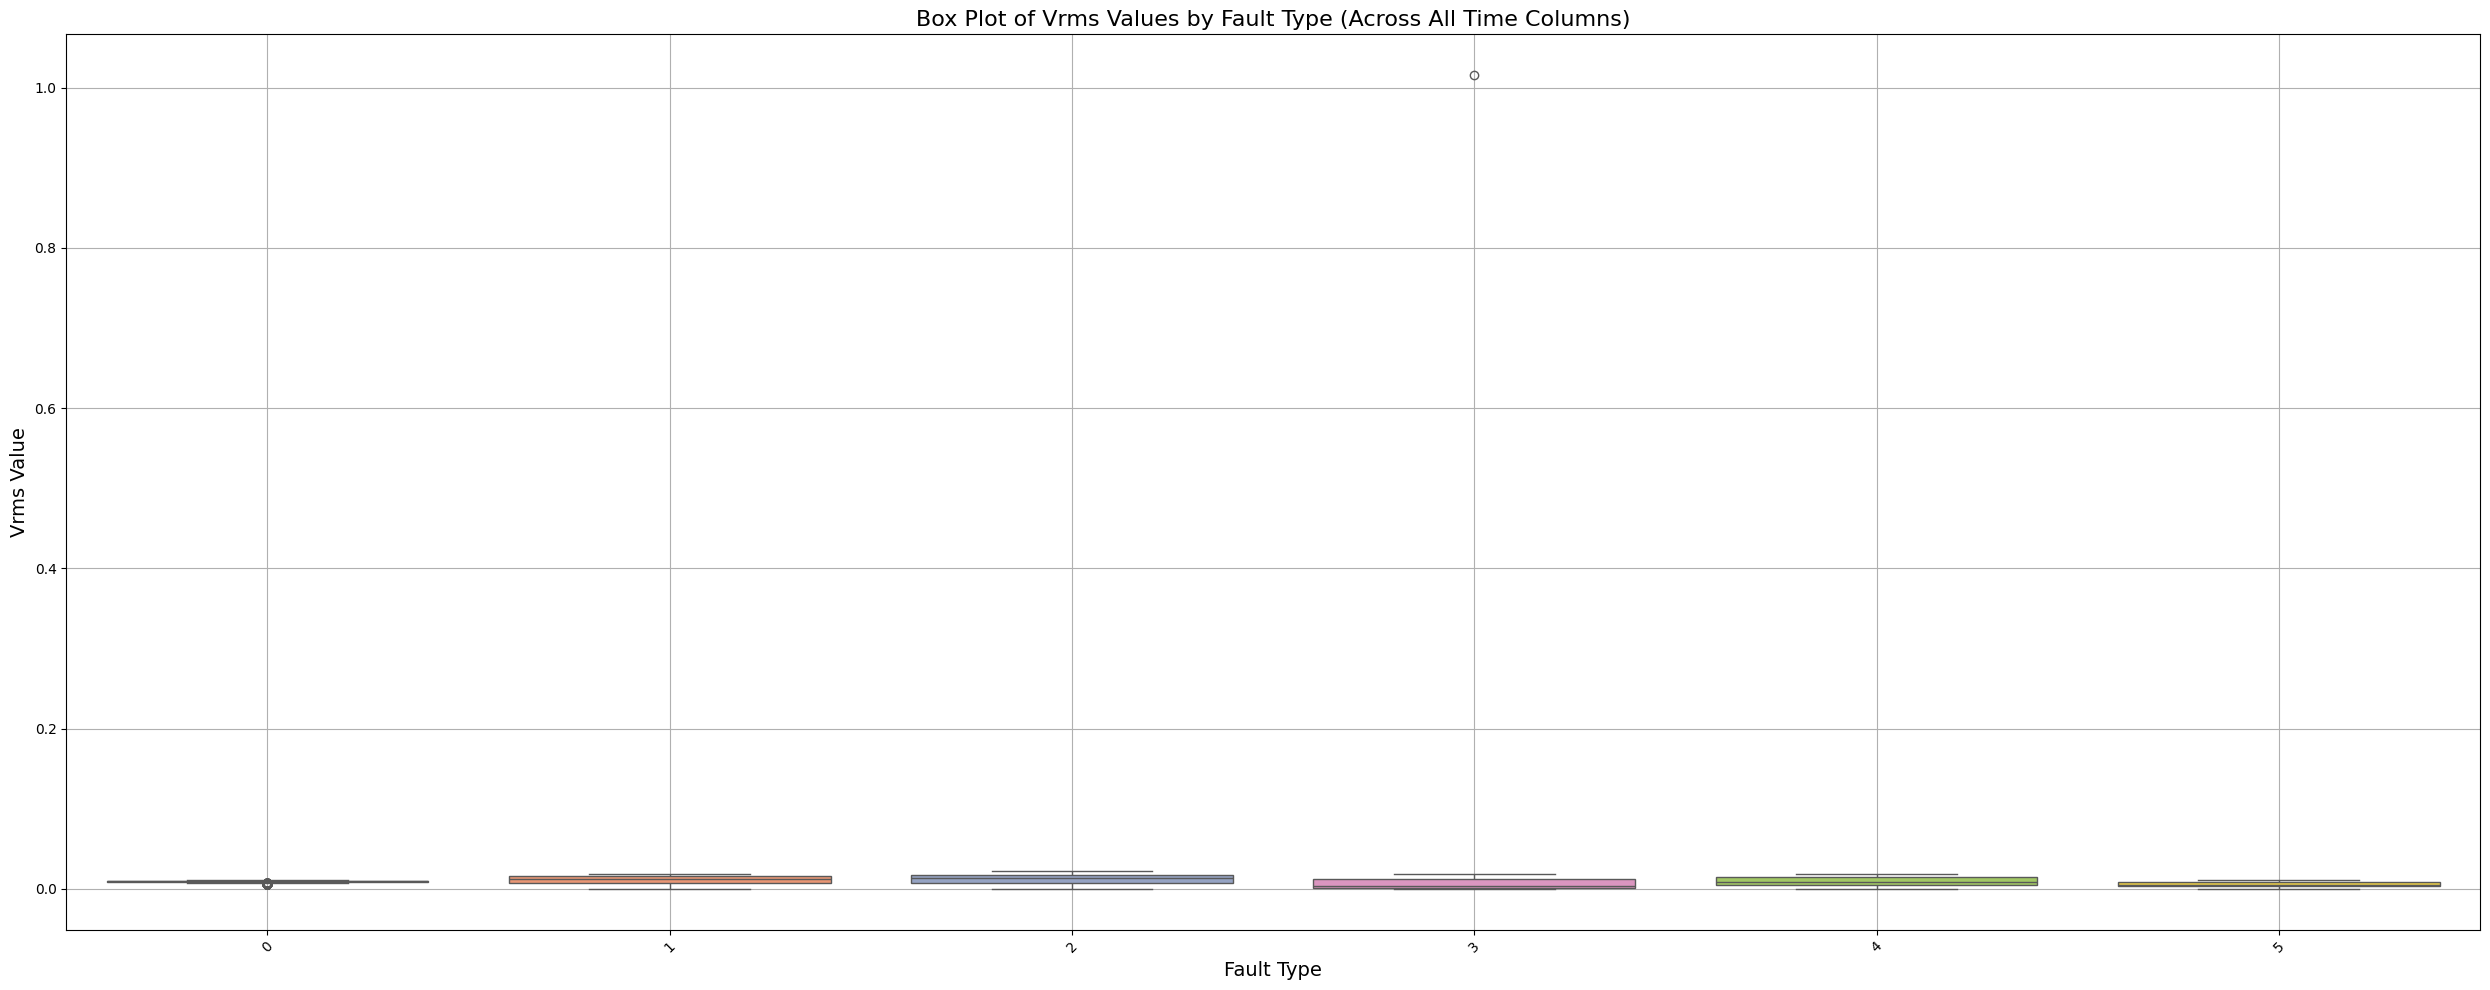

In [ ]:
melted = data.melt(id_vars='output', var_name='Time', value_name='Vrms')

# Plot using seaborn with larger figure size for readability
plt.figure(figsize=(25, 10))
sns.boxplot(x='output', y='Vrms', data=melted, palette='Set2')

# Customize the plot
plt.title('Box Plot of Vrms Values by Fault Type (Across All Time Columns)', fontsize=16)
plt.xlabel('Fault Type', fontsize=14)
plt.ylabel('Vrms Value', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-27-7e5926275af9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['output'] = subset['output'].astype(str)


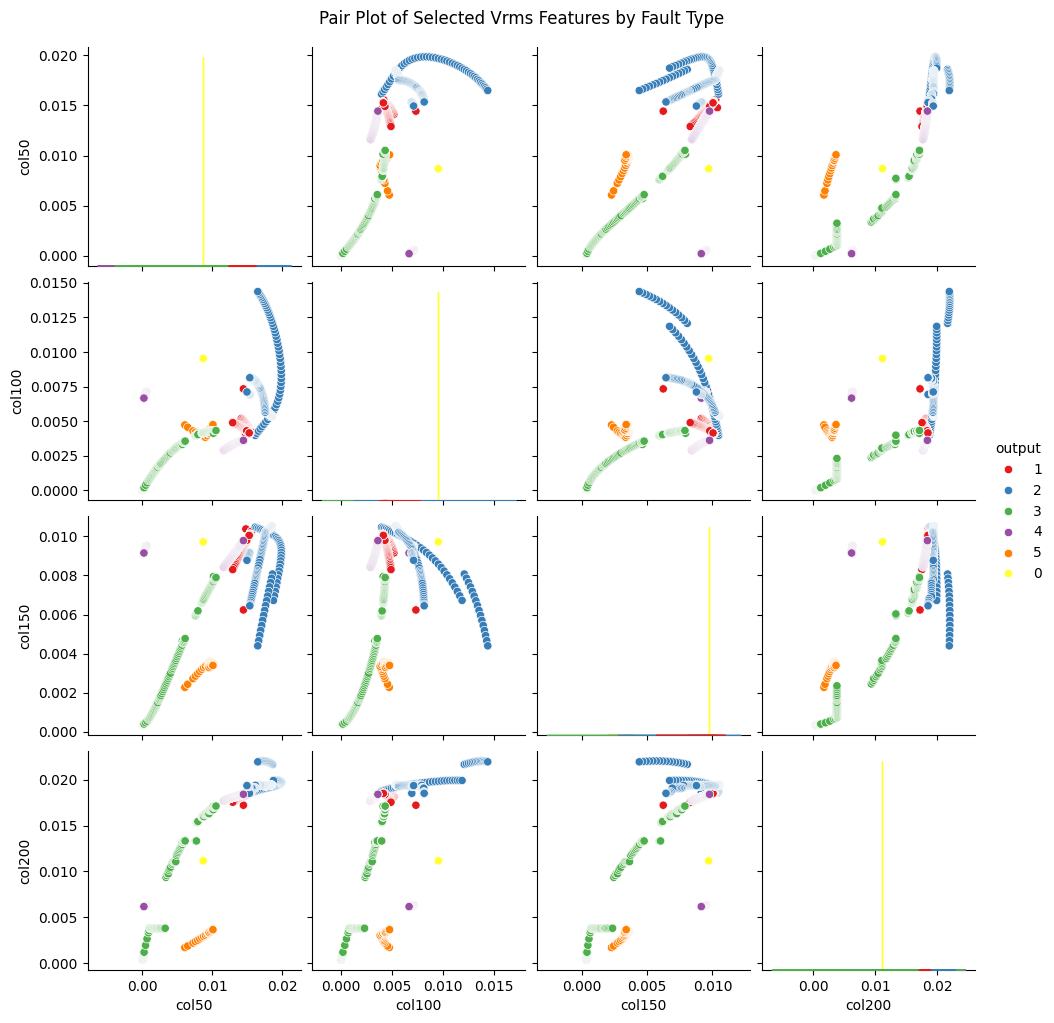

In [ ]:
subset = data[['col50', 'col100', 'col150', 'col200', 'output']]

# Make sure output is treated as a category
subset['output'] = subset['output'].astype(str)

# Plot
sns.pairplot(subset, hue='output', palette='Set1', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Vrms Features by Fault Type", y=1.02)
plt.show()

<ipython-input-59-9c157e6f647d>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  invalid_rows = numeric_data.applymap(lambda x: isinstance(x, str)).any(axis=1)


Number of invalid rows: 0


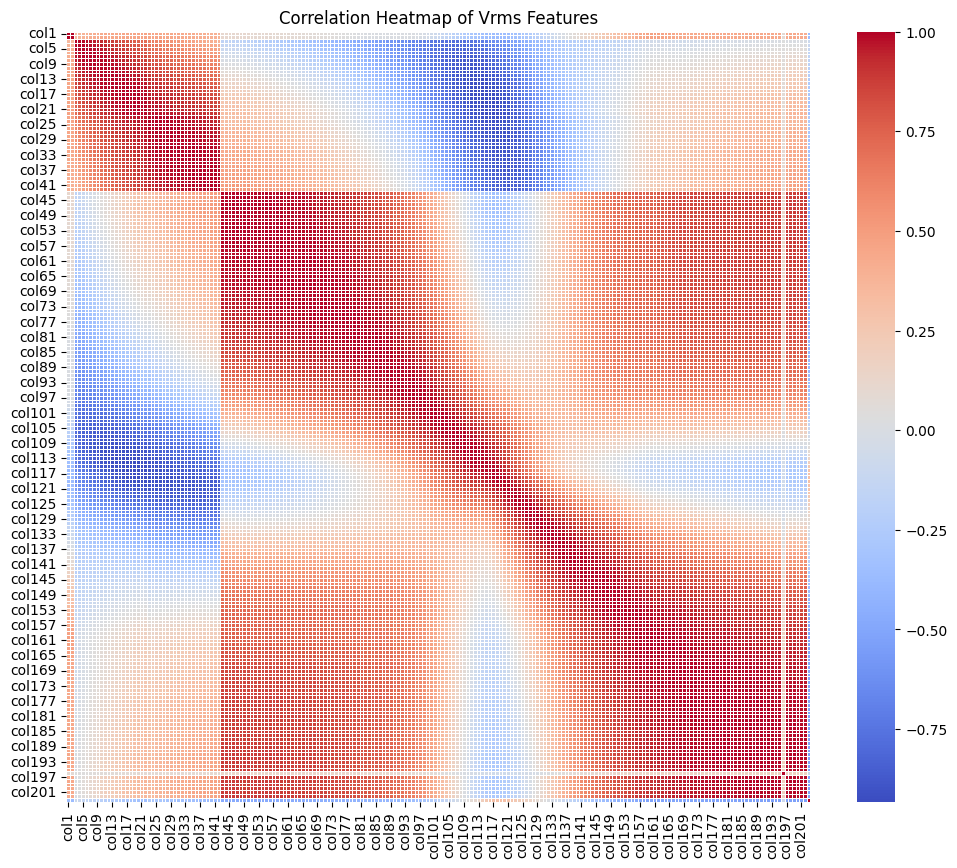

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
# Find rows with non-numeric values (if any)
invalid_rows = numeric_data.applymap(lambda x: isinstance(x, str)).any(axis=1)
print("Number of invalid rows:", invalid_rows.sum())

# Remove those rows
numeric_data_cleaned = numeric_data[~invalid_rows]
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation = numeric_data_cleaned.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Vrms Features')
plt.show()

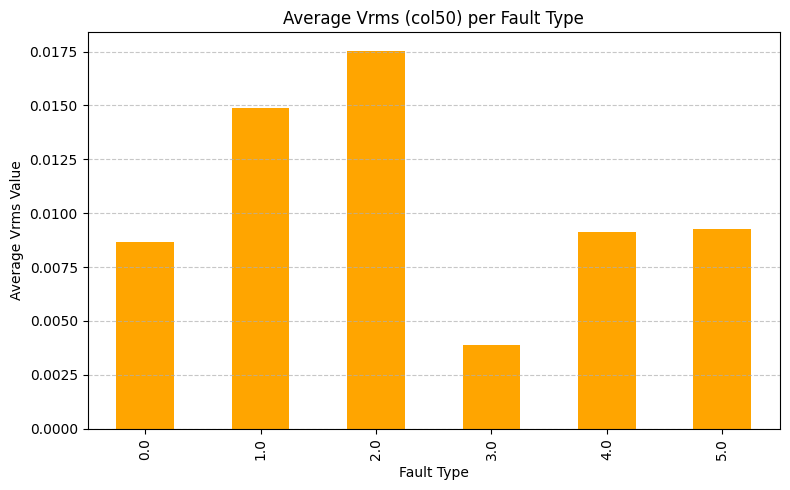

In [ ]:
mean_vrms = data.groupby('output')['col50'].mean()

mean_vrms.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Average Vrms (col50) per Fault Type")
plt.xlabel("Fault Type")
plt.ylabel("Average Vrms Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
data = pd.DataFrame(data_arr)
data.columns = [f'col{i+1}' for i in range(data.shape[1])]
data.rename(columns={'col203': 'output'}, inplace=True)
data.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col194,col195,col196,col197,col198,col199,col200,col201,col202,output
0,0.018064,0.018158,0.018247,0.018333,0.018413,0.018489,0.018561,0.018628,0.018690,0.018748,...,0.016441,0.016582,0.016718,0.016849,0.016976,0.017098,0.017215,0.017328,0.017436,1.0
1,0.018748,0.018801,0.013903,0.014235,0.014332,0.014420,0.014508,0.014589,0.014667,0.014739,...,0.017656,0.017753,0.017844,0.017931,0.018013,0.018090,0.018162,0.018230,0.018293,1.0
2,0.018748,0.018801,0.014190,0.014510,0.014605,0.014692,0.014777,0.014855,0.014931,0.015001,...,0.017702,0.017797,0.017888,0.017974,0.018055,0.018131,0.018203,0.018270,0.018332,1.0
3,0.018748,0.018801,0.014445,0.014755,0.014847,0.014932,0.015015,0.015092,0.015166,0.015233,...,0.017741,0.017836,0.017925,0.018011,0.018091,0.018167,0.018238,0.018304,0.018366,1.0
4,0.018748,0.018801,0.014674,0.014974,0.015064,0.015147,0.015228,0.015303,0.015375,0.015440,...,0.017775,0.017869,0.017958,0.018043,0.018123,0.018198,0.018268,0.018334,0.018395,1.0


In [ ]:
data = data.iloc[np.random.permutation(len(data))].reset_index(drop=True)
data


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col194,col195,col196,col197,col198,col199,col200,col201,col202,output
0,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017930,0.018027,0.018120,0.018208,0.018291,0.018370,0.018444,0.018513,0.018578,1.0
1,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.017413,0.017528,0.017639,0.017745,0.017846,0.017942,0.018033,0.018120,0.018201,1.0
2,0.008225,0.008409,0.008587,0.008762,0.008932,0.009097,0.009259,0.009417,0.009571,0.009718,...,0.003863,0.003833,0.003802,0.003770,0.003737,0.003703,0.003667,0.003631,0.003594,5.0
3,0.018740,0.018793,0.006161,0.007285,0.008376,0.009373,0.010310,0.011170,0.011973,0.012711,...,0.018876,0.018974,0.019069,0.019160,0.019251,0.019325,0.019421,0.019481,0.019551,2.0
4,0.005868,0.005943,0.006016,0.006090,0.006162,0.006235,0.006306,0.006377,0.006448,0.006518,...,0.010927,0.010965,0.011003,0.011041,0.011080,0.011119,0.011158,0.011197,0.011236,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.018740,0.018793,0.004834,0.006077,0.007382,0.008570,0.009674,0.010681,0.011612,0.012462,...,0.018886,0.018984,0.019077,0.019165,0.019249,0.019328,0.019402,0.019474,0.019551,2.0
673,0.018740,0.018793,0.009645,0.010459,0.011084,0.011664,0.012221,0.012739,0.013235,0.013697,...,0.018798,0.018897,0.018990,0.019080,0.019164,0.019244,0.019319,0.019392,0.019461,2.0
674,0.018740,0.018793,0.010249,0.010747,0.010973,0.011183,0.011398,0.011600,0.011803,0.011995,...,0.017656,0.017817,0.017963,0.018099,0.018231,0.018359,0.018510,0.018684,0.018852,2.0
675,0.018740,0.018793,0.018841,0.018885,0.018925,0.018959,0.018989,0.019014,0.019035,0.019051,...,0.004735,0.004611,0.004476,0.004330,0.004173,0.004003,0.003820,0.003623,0.003413,3.0


In [ ]:
rows_with_a = data[data.apply(lambda row: row.astype(str).str.contains('a').any(), axis=1)]
print(rows_with_a)
data= data.drop(index=251).reset_index(drop=True)

Empty DataFrame
Columns: [col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15, col16, col17, col18, col19, col20, col21, col22, col23, col24, col25, col26, col27, col28, col29, col30, col31, col32, col33, col34, col35, col36, col37, col38, col39, col40, col41, col42, col43, col44, col45, col46, col47, col48, col49, col50, col51, col52, col53, col54, col55, col56, col57, col58, col59, col60, col61, col62, col63, col64, col65, col66, col67, col68, col69, col70, col71, col72, col73, col74, col75, col76, col77, col78, col79, col80, col81, col82, col83, col84, col85, col86, col87, col88, col89, col90, col91, col92, col93, col94, col95, col96, col97, col98, col99, col100, ...]
Index: []

[0 rows x 203 columns]


In [ ]:
X = data.iloc[:, :-1].values  # All columns except the last one
Y = data.iloc[:, -1].values
X


array([[0.01873958, 0.01879282, 0.01884141, ..., 0.01844393, 0.01851318,
        0.01857768],
       [0.01873958, 0.01879282, 0.01884141, ..., 0.01803336, 0.0181197 ,
        0.01820113],
       [0.00822516, 0.0084086 , 0.00858733, ..., 0.00366738, 0.00363127,
        0.00359422],
       ...,
       [0.01873955, 0.01879278, 0.01024877, ..., 0.01851041, 0.0186845 ,
        0.0188525 ],
       [0.01873958, 0.01879282, 0.01884141, ..., 0.00381973, 0.00362337,
        0.00341293],
       [0.01873958, 0.01879282, 0.01884141, ..., 0.00095763, 0.00096595,
        0.0009741 ]])

In [ ]:
Y

array([1., 1., 5., 2., 0., 3., 4., 4., 3., 1., 3., 1., 2., 2., 1., 1., 4.,
       1., 2., 5., 5., 5., 5., 1., 0., 3., 5., 0., 4., 3., 4., 1., 1., 1.,
       4., 5., 3., 4., 1., 1., 3., 2., 4., 1., 1., 3., 3., 4., 3., 4., 1.,
       4., 3., 4., 2., 2., 3., 2., 4., 4., 3., 1., 2., 5., 4., 3., 1., 5.,
       2., 4., 4., 5., 4., 2., 4., 1., 4., 3., 3., 2., 2., 2., 2., 3., 5.,
       4., 2., 1., 2., 3., 4., 1., 0., 4., 1., 4., 4., 4., 4., 3., 4., 2.,
       2., 4., 1., 3., 2., 5., 3., 4., 4., 1., 1., 3., 1., 1., 4., 2., 2.,
       1., 3., 0., 4., 1., 1., 4., 1., 5., 2., 4., 4., 3., 4., 4., 4., 4.,
       2., 2., 5., 2., 4., 1., 4., 3., 3., 5., 1., 4., 4., 2., 2., 1., 1.,
       4., 1., 1., 3., 2., 3., 3., 4., 2., 3., 2., 2., 0., 2., 4., 1., 1.,
       1., 4., 3., 2., 4., 1., 4., 2., 3., 5., 2., 1., 4., 3., 2., 3., 1.,
       3., 3., 3., 1., 1., 2., 1., 3., 1., 1., 4., 4., 3., 3., 1., 4., 3.,
       1., 3., 5., 4., 3., 4., 3., 1., 4., 5., 4., 2., 2., 4., 1., 3., 3.,
       2., 1., 5., 2., 5.

In [ ]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(Y.shape,len(X_train), len(X_test), Y_train.shape, Y_test.shape)
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

(676,) 507 169 (507,) (169,)


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy : ', train_data_accuracy)

Accuracy :  1.0


In [ ]:
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy : ', train_data_accuracy)
print(classification_report(Y_test, y_pred))

Accuracy :  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      0.97      0.99        34
         2.0       0.98      1.00      0.99        43
         3.0       1.00      1.00      1.00        37
         4.0       1.00      1.00      1.00        39
         5.0       1.00      1.00      1.00        14

    accuracy                           0.99       169
   macro avg       1.00      1.00      1.00       169
weighted avg       0.99      0.99      0.99       169



In [ ]:
input_data = (0.018739582, 0.018792816, 0.018841414, 0.018885362, 0.018924651, 0.018959271, 0.018989213, 0.019014469, 0.019035034, 0.019050903, 0.019062071, 0.019068536, 0.019070296, 0.01906735, 0.0190597, 0.019047348, 0.019030295, 0.019008548, 0.01898211, 0.018950988, 0.018915191, 0.018874727, 0.017277624, 0.017347752, 0.017322732, 0.017292198, 0.017257509, 0.017217595, 0.017173366, 0.017124111, 0.017070454, 0.017011917, 0.016948941, 0.016881196, 0.016809007, 0.016732142, 0.016650852, 0.016564965, 0.016474687, 0.016379888, 0.016280741, 0.016177147, 0.016069258, 0.015956995, 0.015840497, 0.015719699, 0.015594732, 0.015465542, 0.015332253, 0.01519482, 0.015053365, 0.014907846, 0.014758385, 0.014604946, 0.014447648, 0.014286461, 0.0141215, 0.013952743, 0.013780304, 0.013604163, 0.013424433, 0.0132411, 0.013054276, 0.01286395, 0.012670233, 0.012473119, 0.012272717, 0.012069026, 0.011862154, 0.011652103, 0.011438981, 0.011222793, 0.011003647, 0.01078155, 0.01055661, 0.0103, 0.0101, 0.00987, 0.009629319, 0.009390918, 0.009150035, 0.00890669, 0.008660987, 0.00841, 0.00816, 0.00791, 0.00766, 0.0074, 0.00714, 0.00688, 0.00662, 0.00635, 0.00609, 0.00582, 0.00555, 0.00528, 0.00501, 0.00473, 0.00446, 0.00418, 0.00391, 0.00363, 0.00335, 0.00307, 0.00279, 0.00251, 0.002222927, 0.001939586, 0.001655664, 0.00137, 0.00109, 0.000801, 0.000515, 0.00023, 0.0000601, 0.000363018, 0.000664413, 0.000965419, 0.001266056, 0.001566179, 0.001865777, 0.00216473, 0.002463008, 0.002760507, 0.003057183, 0.003352945, 0.003647739, 0.003941482, 0.004234115, 0.004525559, 0.004815752, 0.00510462, 0.005392098, 0.005678113, 0.005962602, 0.006245493, 0.006526721, 0.006806217, 0.007083916, 0.00735975, 0.007633654, 0.007905562, 0.00817541, 0.008443132, 0.008708665, 0.008971944, 0.009232908, 0.009491493, 0.009747638, 0.010001281, 0.010252361, 0.010500817, 0.010746592, 0.010989624, 0.011229857, 0.011467232, 0.011701693, 0.011933183, 0.012161646, 0.012387028, 0.012609275, 0.012828333, 0.013044149, 0.013256672, 0.013465851, 0.013671634, 0.013873974, 0.014072821, 0.014268127, 0.014459846, 0.014647931, 0.014832337, 0.01501302, 0.015189937, 0.015363044, 0.015532301, 0.015697667, 0.015859101, 0.016016566, 0.016170023, 0.016319435, 0.016468352, 0.016617594, 0.016762718, 0.016903501, 0.017039909, 0.017171914, 0.017299487, 0.017422601, 0.017541227, 0.017655342, 0.017764919, 0.017869937, 0.017970371, 0.018066201, 0.018157406, 0.018243967, 0.018325865, 0.018403084, 0.018475607, 0.01854342, 0.018606509
)

# Convert and reshape
input_array = np.asarray(input_data).reshape(1, -1)

# Standardize input
input_scaled = scaler.transform(input_array)

# Predict
prediction = model.predict(input_scaled)
print(prediction[0])

1.0


In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

In [ ]:
classifier.fit(X_train,Y_train)

SVC()

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.9980276134122288


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on training data : ', test_data_accuray)
print(classification_report(Y_test, y_pred))

Accuracy on training data :  0.9881656804733728
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      0.97      0.99        34
         2.0       0.98      1.00      0.99        43
         3.0       1.00      1.00      1.00        37
         4.0       1.00      1.00      1.00        39
         5.0       1.00      1.00      1.00        14

    accuracy                           0.99       169
   macro avg       1.00      1.00      1.00       169
weighted avg       0.99      0.99      0.99       169



In [ ]:
input_data = (0.018739582, 0.018792816, 0.018841414, 0.018885362, 0.018924651, 0.018959271, 0.018989213, 0.019014469, 0.019035034, 0.019050903, 0.019062071, 0.019068536, 0.019070296, 0.01906735, 0.0190597, 0.019047348, 0.019030295, 0.019008548, 0.01898211, 0.018950988, 0.018915191, 0.018874727, 0.017277624, 0.017347752, 0.017322732, 0.017292198, 0.017257509, 0.017217595, 0.017173366, 0.017124111, 0.017070454, 0.017011917, 0.016948941, 0.016881196, 0.016809007, 0.016732142, 0.016650852, 0.016564965, 0.016474687, 0.016379888, 0.016280741, 0.016177147, 0.016069258, 0.015956995, 0.015840497, 0.015719699, 0.015594732, 0.015465542, 0.015332253, 0.01519482, 0.015053365, 0.014907846, 0.014758385, 0.014604946, 0.014447648, 0.014286461, 0.0141215, 0.013952743, 0.013780304, 0.013604163, 0.013424433, 0.0132411, 0.013054276, 0.01286395, 0.012670233, 0.012473119, 0.012272717, 0.012069026, 0.011862154, 0.011652103, 0.011438981, 0.011222793, 0.011003647, 0.01078155, 0.01055661, 0.0103, 0.0101, 0.00987, 0.009629319, 0.009390918, 0.009150035, 0.00890669, 0.008660987, 0.00841, 0.00816, 0.00791, 0.00766, 0.0074, 0.00714, 0.00688, 0.00662, 0.00635, 0.00609, 0.00582, 0.00555, 0.00528, 0.00501, 0.00473, 0.00446, 0.00418, 0.00391, 0.00363, 0.00335, 0.00307, 0.00279, 0.00251, 0.002222927, 0.001939586, 0.001655664, 0.00137, 0.00109, 0.000801, 0.000515, 0.00023, 0.0000601, 0.000363018, 0.000664413, 0.000965419, 0.001266056, 0.001566179, 0.001865777, 0.00216473, 0.002463008, 0.002760507, 0.003057183, 0.003352945, 0.003647739, 0.003941482, 0.004234115, 0.004525559, 0.004815752, 0.00510462, 0.005392098, 0.005678113, 0.005962602, 0.006245493, 0.006526721, 0.006806217, 0.007083916, 0.00735975, 0.007633654, 0.007905562, 0.00817541, 0.008443132, 0.008708665, 0.008971944, 0.009232908, 0.009491493, 0.009747638, 0.010001281, 0.010252361, 0.010500817, 0.010746592, 0.010989624, 0.011229857, 0.011467232, 0.011701693, 0.011933183, 0.012161646, 0.012387028, 0.012609275, 0.012828333, 0.013044149, 0.013256672, 0.013465851, 0.013671634, 0.013873974, 0.014072821, 0.014268127, 0.014459846, 0.014647931, 0.014832337, 0.01501302, 0.015189937, 0.015363044, 0.015532301, 0.015697667, 0.015859101, 0.016016566, 0.016170023, 0.016319435, 0.016468352, 0.016617594, 0.016762718, 0.016903501, 0.017039909, 0.017171914, 0.017299487, 0.017422601, 0.017541227, 0.017655342, 0.017764919, 0.017869937, 0.017970371, 0.018066201, 0.018157406, 0.018243967, 0.018325865, 0.018403084, 0.018475607, 0.01854342, 0.018606509
)

# Convert and reshape
input_array = np.asarray(input_data).reshape(1, -1)

# Standardize input
input_scaled = scaler.transform(input_array)

# Predict
prediction = model.predict(input_scaled)
print(prediction[0])

1.0


In [ ]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       0.97      0.97      0.97        34
         2.0       0.98      0.98      0.98        43
         3.0       1.00      1.00      1.00        37
         4.0       1.00      1.00      1.00        39
         5.0       1.00      1.00      1.00        14

    accuracy                           0.99       169
   macro avg       0.99      0.99      0.99       169
weighted avg       0.99      0.99      0.99       169



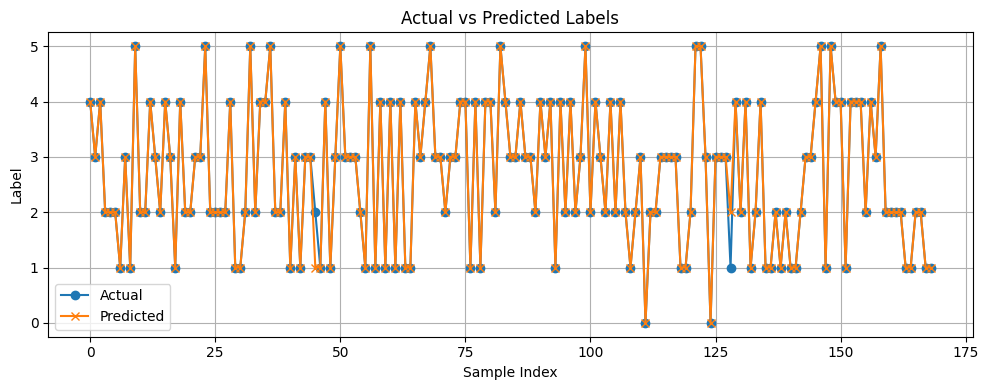

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(Y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming X_scaled is your dataset, already scaled (e.g., MinMaxScaler or StandardScaler)
# If you haven't scaled it yet, you can do this with MinMaxScaler or StandardScaler.

# Let's say X_scaled is a 1D array of 135,946 elements:
X_scaled = np.random.rand(135946)  # Example, replace with your actual data

# Number of features per sample
n_features = 203

# Calculate the number of samples
n_samples = X_scaled.size // n_features  # Integer division (floor)

# Reshape the data
X_reshaped = X_scaled[:n_samples * n_features].reshape((n_samples, n_features, 1))  # 3D shape (samples, features, 1)

print(f"Reshaped X shape: {X_reshaped.shape}")
# This should print something like: (669, 203, 1)

# Now, let's assume you want to split the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Example target variable (Y), same length as X_reshaped (replace with your actual targets)
Y = np.random.rand(n_samples)  # Example, replace with your actual target data

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y, test_size=0.2, random_state=3)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Reshaped X shape: (669, 203, 1)
X_train shape: (535, 203, 1)
X_test shape: (134, 203, 1)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# ==== Load your dataset ====
df = pd.read_excel("/content/power quality issue final dataset.xlsx")  # Update path as needed

# ==== Preprocess ====
X = df.iloc[:, :-1].values  # time-series data
y = df.iloc[:, -1].values   # class labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape into (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode the labels
y_categorical = to_categorical(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# ==== Build the LSTM Model ====
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==== Train ====
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# ==== Evaluate ====
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.3173 - loss: 1.7525 - val_accuracy: 0.4220 - val_loss: 1.5724
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.3685 - loss: 1.5450 - val_accuracy: 0.4220 - val_loss: 1.3150
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.3890 - loss: 1.3150 - val_accuracy: 0.3578 - val_loss: 1.2602
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - accuracy: 0.3950 - loss: 1.2663 - val_accuracy: 0.4862 - val_loss: 1.2088
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.5152 - loss: 1.1556 - val_accuracy: 0.5505 - val_loss: 1.0307
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.5170 - loss: 1.0309 - val_accuracy: 0.5505 - val_loss: 0.9743
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.5711 - loss: 0.9584 - val_accuracy: 0.5963 - val_loss: 0.9289
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.5449 - loss: 0.8997 - val_accuracy: 0.5505 - val_

In [ ]:
predictions = model.predict(X_test)

# If you want to see the predicted values:
print(predictions)

# If you want to evaluate the model's performance:
loss = model.evaluate(X_test, y_test)

print('Accuracy on training data : ', test_data_accuray)
print(f"Test Loss: {loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
[[2.42461916e-03 3.60199034e-01 2.32055946e-03 5.90953627e-04
  6.34245992e-01 2.18800036e-04]
 [6.96350588e-04 8.23149502e-01 6.05229009e-03 6.86774438e-04
  1.69300169e-01 1.14888157e-04]
 [7.54929861e-05 4.71597956e-03 9.94180977e-01 5.44039067e-04
  4.49444778e-04 3.41595223e-05]
 [6.83677135e-05 4.53513861e-03 9.94433343e-01 5.08846657e-04
  4.23259131e-04 3.10515134e-05]
 [5.54111239e-06 9.50140311e-05 1.60908705e-04 7.25213647e-01
  7.59536197e-05 2.74448931e-01]
 [5.99430641e-04 8.44940662e-01 6.37978967e-03 6.93242182e-04
  1.47281095e-01 1.05736595e-04]
 [8.02826807e-02 7.15567619e-02 7.78936595e-03 4.69113328e-03
  8.33312631e-01 2.36745109e-03]
 [5.31965541e-03 9.99572873e-03 6.43726846e-04 1.65710493e-03
  9.80401576e-01 1.98212732e-03]
 [2.90102535e-03 2.70678759e-01 2.15299800e-03 6.93529379e-04
  7.23240972e-01 3.32630210e-04]
 [6.92226895e-05 4.56151646e-03 9.94398057e-01 5.13138599e-04
  4.26694663e-04 3.14194149e-05]
 [6.1152793

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


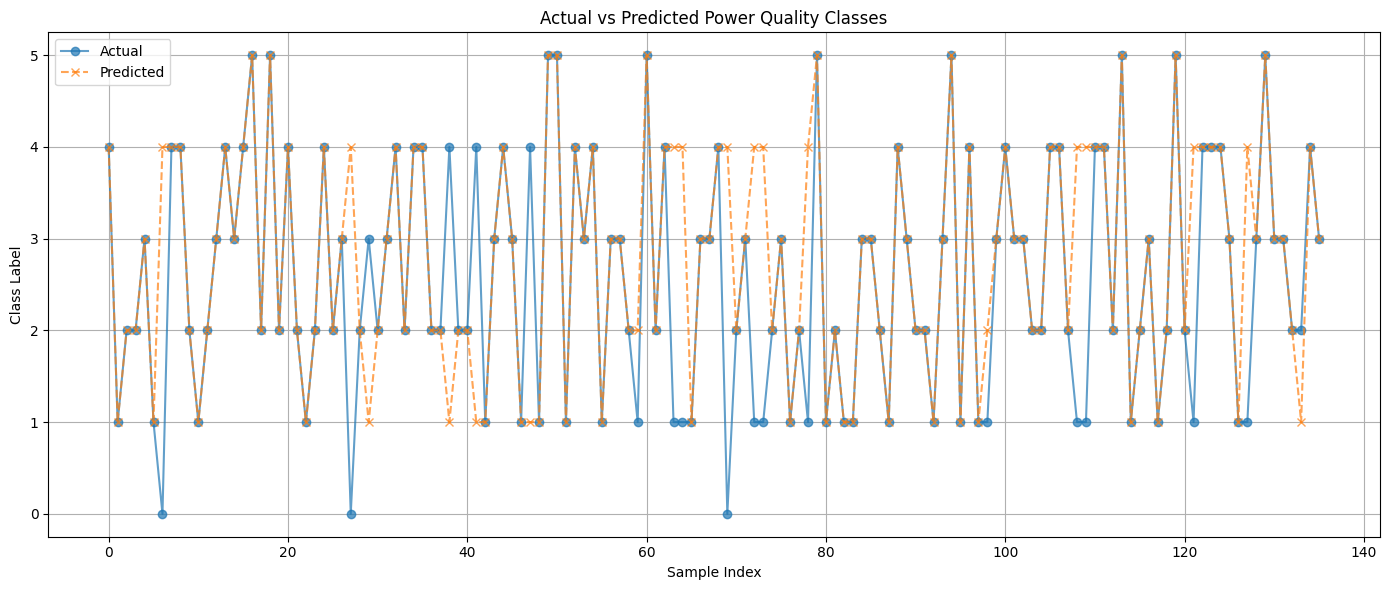

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ==== Predict ====
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# ==== Plot ====
plt.figure(figsize=(14, 6))
plt.plot(y_true_classes, label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_classes, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Power Quality Classes')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle  # To load the saved scaler (if you saved it)
from tensorflow.keras.models import load_model  # To load your trained model

# Load the previously fitted scaler
try:
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
except FileNotFoundError:
    print("Error: scaler.pkl not found. Make sure you have saved your scaler.")
    exit()

# Load your trained model
try:
    model = load_model('your_model.h5')  # Replace 'your_model.h5' with your model file
except FileNotFoundError:
    print("Error: your_model.h5 not found. Make sure you have saved your model.")
    exit()
scaler = StandardScaler()

# Your input data (length 276)
input_data = (0.018739582, 0.018792816, 0.018841414, 0.018885362, 0.018924651, 0.018959271, 0.018989213, 0.019014469, 0.019035034, 0.019050903, 0.019062071, 0.019068536, 0.019070296, 0.01906735, 0.0190597, 0.019047348, 0.019030295, 0.019008548, 0.01898211, 0.018950988, 0.018915191, 0.018874727, 0.017277624, 0.017347752, 0.017322732, 0.017292198, 0.017257509, 0.017217595, 0.017173366, 0.017124111, 0.017070454, 0.017011917, 0.016948941, 0.016881196, 0.016809007, 0.016732142, 0.016650852, 0.016564965, 0.016474687, 0.016379888, 0.016280741, 0.016177147, 0.016069258, 0.015956995, 0.015840497, 0.015719699, 0.015594732, 0.015465542, 0.015332253, 0.01519482, 0.015053365, 0.014907846, 0.014758385, 0.014604946, 0.014447648, 0.014286461, 0.0141215, 0.013952743, 0.013780304, 0.013604163, 0.013424433, 0.0132411, 0.013054276, 0.01286395, 0.012670233, 0.012473119, 0.012272717, 0.012069026, 0.011862154, 0.011652103, 0.011438981, 0.011222793, 0.011003647, 0.01078155, 0.01055661, 0.0103, 0.0101, 0.00987, 0.009629319, 0.009390918, 0.009150035, 0.00890669, 0.008660987, 0.00841, 0.00816, 0.00791, 0.00766, 0.0074, 0.00714, 0.00688, 0.00662, 0.00635, 0.00609, 0.00582, 0.00555, 0.00528, 0.00501, 0.00473, 0.00446, 0.00418, 0.00391, 0.00363, 0.00335, 0.00307, 0.00279, 0.00251, 0.002222927, 0.001939586, 0.001655664, 0.00137, 0.00109, 0.000801, 0.000515, 0.00023, 0.0000601, 0.000363018, 0.000664413, 0.000965419, 0.001266056, 0.001566179, 0.001865777, 0.00216473, 0.002463008, 0.002760507, 0.003057183, 0.003352945, 0.003647739, 0.003941482, 0.004234115, 0.004525559, 0.004815752, 0.00510462, 0.005392098, 0.005678113, 0.005962602, 0.006245493, 0.006526721, 0.006806217, 0.007083916, 0.00735975, 0.007633654, 0.007905562, 0.00817541, 0.008443132, 0.008708665, 0.008971944, 0.009232908, 0.009491493, 0.009747638, 0.010001281, 0.010252361, 0.010500817, 0.010746592, 0.010989624, 0.011229857, 0.011467232, 0.011701693, 0.011933183, 0.012161646, 0.012387028, 0.012609275, 0.012828333, 0.013044149, 0.013256672, 0.013465851, 0.013671634, 0.013873974, 0.014072821, 0.014268127, 0.014459846, 0.014647931, 0.014832337, 0.01501302, 0.015189937, 0.015363044, 0.015532301, 0.015697667, 0.015859101, 0.016016566, 0.016170023, 0.016319435, 0.016468352, 0.016617594, 0.016762718, 0.016903501, 0.017039909, 0.017171914, 0.017299487, 0.017422601, 0.017541227, 0.017655342, 0.017764919, 0.017869937, 0.017970371, 0.018066201, 0.018157406, 0.018243967, 0.018325865, 0.018403084, 0.018475607, 0.01854342, 0.018606509)

# Convert to numpy array
input_array = np.asarray(input_data)

# **Crucial Step: Reshape to have 202 features**
# This is where you need to understand how your original data
# was structured. If each of the 276 values was somehow related
# to 202 features (e.g., through some transformation during
# training), you need to replicate that here.

# **If the scaler was trained on 202 features PER TIME STEP
# of your sequence, and your sequence length is 276, then your
# input to the scaler should ideally be of shape (276, 202).**

# **However, given your LSTM input shape of (1, 276, 1), it's more
# likely the scaler was applied to the 1 feature at each time step.**

# **Let's assume the scaler was indeed trained on 1 feature per time step.**
# In this case, the error strongly suggests you are using the wrong scaler.

# **If you are sure the scaler should expect 1 feature:**
input_scaled = scaler.transform(input_array.reshape(-1, 1)).reshape(1, -1, 1)

# Predict
prediction = model.predict(input_scaled)
predicted_class = np.argmax(prediction, axis=1)[0]

print("Predicted class:", predicted_class)

# **Important:** If the above still gives the error, it means the
# assumption about 1 feature is wrong, and the scaler expects 202.
# In that case, you need to figure out how to get 202 features
# from your 276 input values. This might involve:

# 1. Realizing your input data needs to be structured differently.
# 2. That the scaler you loaded is for a different preprocessing scheme.

# **Example if you somehow needed to create 202 features from your 276 values
# (This is highly speculative and depends on your original data):**
#
# if input_array.shape[0] >= 202:
#     # Take the first 202 values as features (this is just an example)
#     input_reshaped_for_scaling = input_array[:202].reshape(1, -1)
#     input_scaled = scaler.transform(input_reshaped_for_scaling)
#     input_scaled_for_model = input_scaled.reshape(1, -1, 1) # Or (1, 1, 202) depending on your model
#     prediction = model.predict(input_scaled_for_model)
#     predicted_class = np.argmax(prediction, axis=1)[0]
#     print("Predicted class:", predicted_class)
# else:
#     print("Error: Input data does not have enough values to create 202 features.")

# **Another possibility: The scaler was applied to the 276 time steps as features.**
# In this case, the scaler would expect 276 features. The error says 202.

# **The most robust solution is to go back to your training code and understand:**
# 1. What was the shape of the data when it was fed into the StandardScaler?
# 2. Save the StandardScaler object properly after fitting.
# 3. Ensure you are loading that exact same scaler for prediction.

# **Revised code assuming the scaler was trained on 202 features PER TIME STEP (This is less likely given your LSTM input shape):**
#
# input_array = np.asarray(input_data)
#
# # Reshape to (276, 1) - each time step is a sample with 1 feature
# input_reshaped_for_scaling = input_array.reshape(-1, 1)
#
# # If the scaler expects 202 features, you might need to restructure your input
# # or realize that your current input format is incompatible.
#
# # **Highly speculative attempt to reshape if the first 202 time steps
# # were somehow treated as 202 features:**
# if input_array.shape[0] >= 202:
#     input_to_scaler = input_array[:202].reshape(1, -1)
#     input_scaled = scaler.transform(input_to_scaler)
#     input_scaled_for_model = input_scaled.reshape(1, 202, 1) # Adjust based on your model's input shape
#     prediction = model.predict(input_scaled_for_model)
#     predicted_class = np.argmax(prediction, axis=1)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample training data (replace with your actual data)
train_data = np.random.rand(100, 276) # 100 samples, 276 time steps, 1 feature
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
train_labels = np.random.randint(0, 2, 100) # Example: binary classification

# Fit the StandardScaler
scaler = StandardScaler()
# Reshape for scaling: (num_samples * timesteps, num_features)
train_data_reshaped_for_scaling = train_data.reshape(-1, 1)
scaler.fit(train_data_reshaped_for_scaling)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as scaler.pkl")

# Define and train your model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(276, 1)))
model.add(Dense(1, activation='sigmoid')) # Example output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=10)

# Save the model
model.save('your_model.h5')
print("Model saved as your_model.h5")

Scaler saved as scaler.pkl
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5360 - loss: 0.6927
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5026 - loss: 0.6965
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.5151 - loss: 0.6959
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.5203 - loss: 0.6947
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.5026 - loss: 0.6972
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.5339 - loss: 0.6923
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.5360 - loss: 0.6918
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5287 - loss: 0.6929
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5276 - loss: 0.6931
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5297 - loss: 0.6925


Model saved as your_model.h5


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from tensorflow.keras.models import load_model

# Load the previously fitted scaler
try:
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    print("Scaler loaded successfully.")
except FileNotFoundError:
    print("Error: scaler.pkl not found. Make sure you have saved your scaler in the same directory.")
    exit()

# Load your trained model
try:
    model = load_model('your_model.h5')
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: your_model.h5 not found. Make sure you have saved your model in the same directory.")
    exit()

# Your input data (length 276)
input_data = (0.018739582, 0.018792816, 0.018841414, 0.018885362, 0.018924651, 0.018959271, 0.018989213, 0.019014469, 0.019035034, 0.019050903, 0.019062071, 0.019068536, 0.019070296, 0.01906735, 0.0190597, 0.019047348, 0.019030295, 0.019008548, 0.01898211, 0.018950988, 0.018915191, 0.018874727, 0.017277624, 0.017347752, 0.017322732, 0.017292198, 0.017257509, 0.017217595, 0.017173366, 0.017124111, 0.017070454, 0.017011917, 0.016948941, 0.016881196, 0.016809007, 0.016732142, 0.016650852, 0.016564965, 0.016474687, 0.016379888, 0.016280741, 0.016177147, 0.016069258, 0.015956995, 0.015840497, 0.015719699, 0.015594732, 0.015465542, 0.015332253, 0.01519482, 0.015053365, 0.014907846, 0.014758385, 0.014604946, 0.014447648, 0.014286461, 0.0141215, 0.013952743, 0.013780304, 0.013604163, 0.013424433, 0.0132411, 0.013054276, 0.01286395, 0.012670233, 0.012473119, 0.012272717, 0.012069026, 0.011862154, 0.011652103, 0.011438981, 0.011222793, 0.011003647, 0.01078155, 0.01055661, 0.0103, 0.0101, 0.00987, 0.009629319, 0.009390918, 0.009150035, 0.00890669, 0.008660987, 0.00841, 0.00816, 0.00791, 0.00766, 0.0074, 0.00714, 0.00688, 0.00662, 0.00635, 0.00609, 0.00582, 0.00555, 0.00528, 0.00501, 0.00473, 0.00446, 0.00418, 0.00391, 0.00363, 0.00335, 0.00307, 0.00279, 0.00251, 0.002222927, 0.001939586, 0.001655664, 0.00137, 0.00109, 0.000801, 0.000515, 0.00023, 0.0000601, 0.000363018, 0.000664413, 0.000965419, 0.001266056, 0.001566179, 0.001865777, 0.00216473, 0.002463008, 0.002760507, 0.003057183, 0.003352945, 0.003647739, 0.003941482, 0.004234115, 0.004525559, 0.004815752, 0.00510462, 0.005392098, 0.005678113, 0.005962602, 0.006245493, 0.006526721, 0.006806217, 0.007083916, 0.00735975, 0.007633654, 0.007905562, 0.00817541, 0.008443132, 0.008708665, 0.008971944, 0.009232908, 0.009491493, 0.009747638, 0.010001281, 0.010252361, 0.010500817, 0.010746592, 0.010989624, 0.011229857, 0.011467232, 0.011701693, 0.011933183, 0.012161646, 0.012387028, 0.012609275, 0.012828333, 0.013044149, 0.013256672, 0.013465851, 0.013671634, 0.013873974, 0.014072821, 0.014268127, 0.014459846, 0.014647931, 0.014832337, 0.01501302, 0.015189937, 0.015363044, 0.015532301, 0.015697667, 0.015859101, 0.016016566, 0.016170023, 0.016319435, 0.016468352, 0.016617594, 0.016762718, 0.016903501, 0.017039909, 0.017171914, 0.017299487, 0.017422601, 0.017541227, 0.017655342, 0.017764919, 0.017869937, 0.017970371, 0.018066201, 0.018157406, 0.018243967, 0.018325865, 0.018403084, 0.018475607, 0.01854342, 0.018606509)
# Convert to numpy array
input_array = np.asarray(input_data)

# Reshape for scaling based on how the scaler was fitted during training
# Assuming the scaler was fitted on the individual values (1 feature per time step)
input_scaled = scaler.transform(input_array.reshape(-1, 1)).reshape(1, -1, 1)

# Predict
prediction = model.predict(input_scaled)
predicted_class = np.argmax(prediction, axis=1)[0]

print("Predicted class:", predicted_class)

Scaler loaded successfully.
Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted class: 0
